# Урок 3. Операции над столбцами, DAU/MAU

## 3.1 Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные

In [43]:
data = pd.read_excel('lesson03_user_activity.xlsx')
data.head(5)

,user_id,device,date
0,74793686a6268281,iPhone,2021-02-01
1,6986c3d2188caf4b,Android,2021-02-01
2,d9a79c634cc6df36,iPhone,2021-02-01
3,b3b0c361708b69a9,PC,2021-02-01
4,48ddcd54a6844b70,Mac,2021-02-01


Посмотрим на типы и размерность данных:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  279463 non-null  object        
 1   device   279463 non-null  object        
 2   date     279463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 6.4+ MB


Модифицируем типы данных там, где это нужно:

In [4]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  279463 non-null  object        
 1   device   279463 non-null  object        
 2   date     279463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 6.4+ MB


Теперь давайте разберемся, какие именно показатели хранятся в нашем фрейме:
- user_id - уникальный идентификатор пользователя;
- device - устройство, с которого было совершено посещение;
- date - дата посещения.

## 3.2 Бизнес показатели: DAU, WAU и MAU.

В рамках курса мы изучим несколько видов ключевых KPI (от англ key performance indicator - ключевой
показатель эффективности), которые используются в бинес анализе и, в частности, в продуктовом
анализе.  

Первый из них - DAU (от английского daily active users - ежедневные ***активные уникальные*** пользователи). DAU
используется для понимания того, как во времени меняется активность пользователей продукта.
Сколько пользователей приходят пользоваться продуктом каждый день, растет или падает число
пользователей.  
Т.е. если 100 человек посетили наш сайт 300 раз, то DAU = 100

Кроме DAU есть еще WAU (от английского weekly active users - еженедельные активные пользователи)
и MAU (от английского monthly active users - ежемесяцные активные пользователи). Чаще всего, тем
не менее, используется DAU.  

>**ВАЖНО:** дата отсчет WAU не обязательно понедельник, а MAU – первое число месяца. Это могут быть любые 7 дней и любые 30 дней

Активные пользователи – те, кто заходил в приложение хотя бы один раз за конкретный отрезок времени

<img src="./images/slide-4_3-61-1.png" width=500 />

**Зачем их вообще считать?**
- Оценить популярность приложения/сайта
- Определить эффективность рекламы
- Выявить сезонность

**В каких ситуациях считать каждую из метрик?**
- DAU – используются каждый день: игры, to-do листы
- WAU – используются часто: форумы, рабочие месседжеры
- MAU – используются раз в месяц

**В общем случае**
- DAU – отражает моментальную реакцию людей
- MAU/WAU – говорит о стабильности спроса

DAU считается очень просто – на каждый календарный день расчитывается количество уникальных
посетителей системы.  

Забегая вперед (про группировки мы будем говорить немного позже), посмотрим, как мы можем
расчитать DAU. Возьмем новый фрейм:

In [5]:
user_activity = pd.read_excel('lesson03_user_activity.xlsx')
user_activity['date'] = pd.to_datetime(user_activity['date'])
user_activity['date_only'] = pd.to_datetime(user_activity['date']).dt.date  # извлекает только дату без времени
user_activity['date_month'] = user_activity['date'].dt.to_period('M')
user_activity.info()
user_activity.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     279463 non-null  object        
 1   device      279463 non-null  object        
 2   date        279463 non-null  datetime64[ns]
 3   date_only   279463 non-null  object        
 4   date_month  279463 non-null  period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 10.7+ MB


,user_id,device,date,date_only,date_month
0,74793686a6268281,iPhone,2021-02-01,2021-02-01,2021-02
1,6986c3d2188caf4b,Android,2021-02-01,2021-02-01,2021-02
2,d9a79c634cc6df36,iPhone,2021-02-01,2021-02-01,2021-02
3,b3b0c361708b69a9,PC,2021-02-01,2021-02-01,2021-02
4,48ddcd54a6844b70,Mac,2021-02-01,2021-02-01,2021-02
5,dca8f3fc6921a1af,PC,2021-02-01,2021-02-01,2021-02
6,f999ba11dc2f2101,Android,2021-02-01,2021-02-01,2021-02
7,811db95702c1a405,iPhone,2021-02-01,2021-02-01,2021-02
8,b0f294506618160d,Mac,2021-02-01,2021-02-01,2021-02
9,b1b531144a7cd0f7,PC,2021-02-01,2021-02-01,2021-02


Вычислим DAU

In [6]:
dau = user_activity.groupby('date').agg({'user_id': 'nunique'})
dau.columns = ['DAU']
dau.head(3)

,DAU
date,
2021-02-01,1727
2021-02-02,1899
2021-02-03,1994


Вычислим MAU

In [44]:
mau = user_activity.groupby('date_month').agg({'user_id': 'nunique'})
mau.columns = ['MAU']
mau.head()

,MAU
date_month,
2021-02,44419
2021-03,45849
2021-04,41995
2021-05,44046


### 3.2.1 Бизнес показатели: PCU, ACU

PCU (Peak Concurrent User или «пик пользователей онлайн») – это то максимальное количество пользователей, которые одновременно находятся в приложении. Показатель измеряется за час, месяц или год.

В то же время, средний показатель – это ACU (Average Concurrent User или «среднее число пользователей онлайн»). Здесь речь идет о количестве пользователей, которые единовременно находятся в приложении в течение конкретного временного отрезка

In [8]:
log_df = pd.read_csv("log_users.csv", index_col=0)
log_df.head()

,user_id,login_time,logout_time
0,1,2024-10-21 17:51:11,2024-10-21 21:23:47
1,2,2024-10-21 05:38:39,2024-10-21 07:10:50
2,3,2024-10-21 10:27:11,2024-10-21 11:03:27
3,4,2024-10-21 10:31:14,2024-10-21 12:05:04
4,5,2024-10-21 14:40:47,2024-10-21 16:19:47


In [9]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      100 non-null    int64 
 1   login_time   100 non-null    object
 2   logout_time  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [10]:
log_df['login_time'] = pd.to_datetime(log_df['login_time'])
log_df['logout_time'] = pd.to_datetime(log_df['logout_time'])
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      100 non-null    int64         
 1   login_time   100 non-null    datetime64[ns]
 2   logout_time  100 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 3.1 KB


#### Рассчитаем PCU

In [11]:
events = []
for i, row in log_df.iterrows():
    events.append((row['login_time'], 'login'))
    events.append((row['logout_time'], 'logout'))

# Сортируем события по времени
events.sort()

In [12]:
# Рассчитываем PCU
current_users = 0
pcu = 0

for event in events:
    time, event_type = event
    if event_type == 'login':
        current_users += 1
        pcu = max(pcu, current_users)
    else:
        current_users -= 1

f"PCU = {pcu}"

'PCU = 14'

#### Рассчитаем ACU

In [42]:
from datetime import timedelta

current_users = 0
time_active = timedelta(0)

end_date = log_df['logout_time'].max()
start_date = log_df['login_time'].min()
last_time = start_date

for event in events:
    time, event_type = event

    if event_type == 'login':
        current_users += 1
    elif event_type == 'logout':
        current_users -= 1

    # Добавляем количество активных пользователей, умноженное на длительность периодаm
    time_diff = time - last_time
    time_active += time_diff * current_users

    # Обновляем последнее время события
    last_time = time

if last_time < end_date:
    time_active += (end_date - last_time) * current_users

total_period = end_date - start_date

acu = time_active.total_seconds() / total_period.total_seconds()

f"ACU = {acu:.3}"

'ACU = 7.47'

### 3.2.2 Бизнес показатель Stickness

**Sticky Factor, или Stickness** (степень вовлечённости, коэффициент «липучести») — показатель лояльности аудитории к приложению. Оценивает, как часто клиенты возвращаются в приложение в течение недели или месяца. Чаще считают месячный показатель.

<img src="./images/stickness.png" width=500 />

Рассчитаем месячный Stickness для наших данных

In [14]:
dau.head(), mau.head()

(             DAU
 date            
 2021-02-01  1727
 2021-02-02  1899
 2021-02-03  1994
 2021-02-04  2102
 2021-02-05  2248,
               MAU
 date_month       
 2021-02     44419
 2021-03     45849
 2021-04     41995
 2021-05     44046)

In [15]:
dau_stickness = dau.copy(deep=True)

dau_stickness['date_month'] = dau_stickness.index
dau_stickness['date_month'] = dau_stickness['date_month'].dt.to_period('M')

dau_stickness = dau_stickness.groupby('date_month').agg({'DAU': 'mean'})

dau_stickness.columns = ['Mean_DAU']
dau_stickness

,Mean_DAU
date_month,
2021-02,2447.750000
2021-03,2324.548387
2021-04,2246.533333
2021-05,2305.387097


In [16]:
month_stickness = dau_stickness['Mean_DAU'] / mau['MAU'] * 100
month_stickness

date_month
2021-02    5.510592
2021-03    5.070009
2021-04    5.349526
2021-05    5.234044
Freq: M, dtype: float64

(0.0, 6.0)

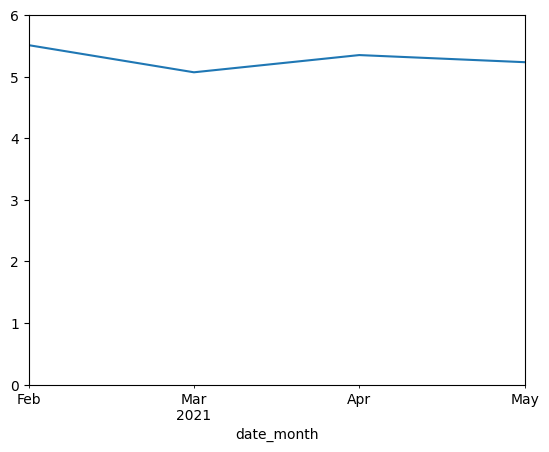

In [46]:
month_stickness.plot()
plt.ylim(0, 6)

## 3.3 Построение простейших графиков

Возьмем наш фрейм dau и построим график изменений DAU во времени:

<Axes: xlabel='date'>

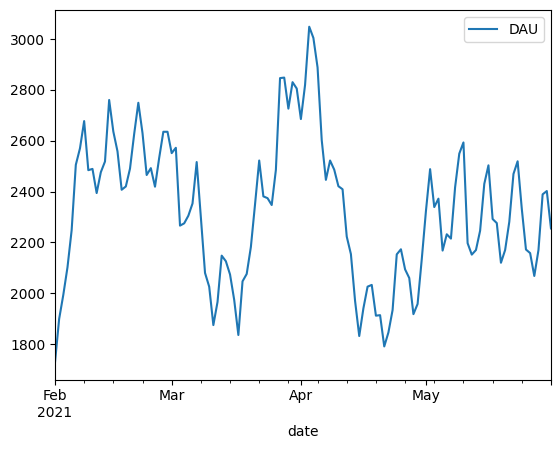

In [18]:
dau.plot()

Увеличим его, установим заголовок и подписи осей:

Text(0, 0.5, 'Уникальные пользователи')

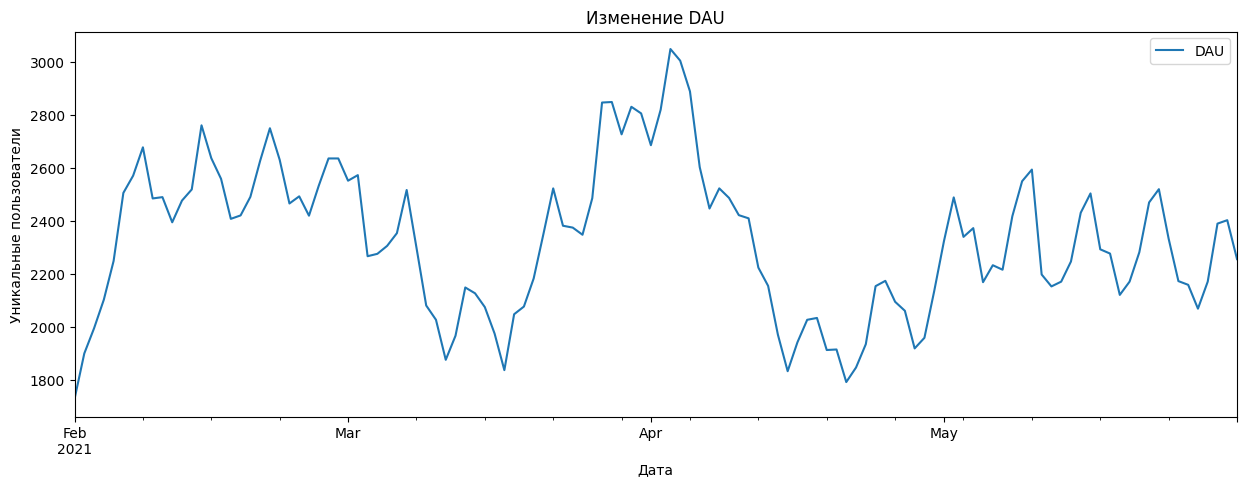

In [19]:
dau.plot(figsize=(15, 5))
plt.title('Изменение DAU')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')

Построим чуть более сложный график - разбивку DAU по устройствам. Для этого, для начала
сгруппируем данные по дате и устройству:

In [20]:
dau_device = data.pivot_table(index='date', columns='device', values='user_id', aggfunc='nunique')
dau_device.head(5)

device,Android,Mac,PC,iPhone
date,,,,
2021-02-01,472,303,312,640
2021-02-02,549,325,328,697
2021-02-03,593,349,336,716
2021-02-04,618,372,356,756
2021-02-05,653,380,375,840


Построим график:

Text(0, 0.5, 'Уникальные пользователи')

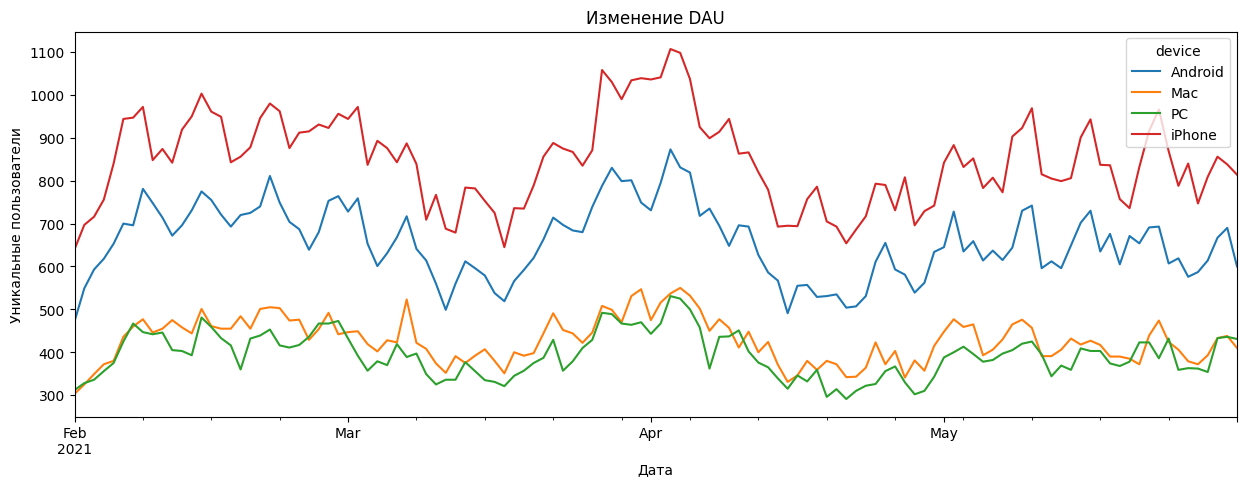

In [21]:
dau_device.plot(figsize=(15, 5))
plt.title('Изменение DAU')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')

Посмотрим так же на график MAU:

Text(0, 0.5, 'Уникальные пользователи')

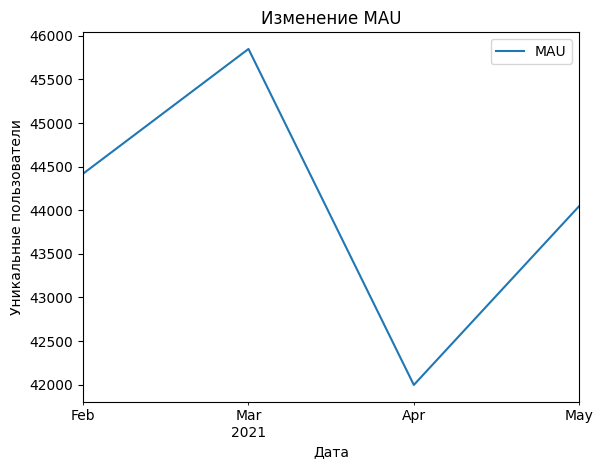

In [49]:
mau.plot()
plt.title('Изменение MAU')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')
# plt.ylim(0, 47000)

## 3.4 Модификация данных в фреймах

Существуют 4 основных метода модификации данных в фреймах. Вот они в порядке скорости
выполнения:
1. Операции над столбцами;
2. Работа с функцией apply;
3. Прямая модификация даннах в ячейках с помощью .loc.

### 3.4.1 Операции над столбцами

Возьмем наш фрейм и посмотрим на его примере как работают операции над столбцами:

In [23]:
dau_device.head(5)

device,Android,Mac,PC,iPhone
date,,,,
2021-02-01,472,303,312,640
2021-02-02,549,325,328,697
2021-02-03,593,349,336,716
2021-02-04,618,372,356,756
2021-02-05,653,380,375,840


Создание нового столбца:

In [24]:
dau_device['total_dau'] = 1
dau_device.head(5)

device,Android,Mac,PC,iPhone,total_dau
date,,,,,
2021-02-01,472,303,312,640,1
2021-02-02,549,325,328,697,1
2021-02-03,593,349,336,716,1
2021-02-04,618,372,356,756,1
2021-02-05,653,380,375,840,1


Сложение столбцов:

In [25]:
dau_device['total_dau'] = dau_device['Android'] + dau_device['Mac'] + dau_device['PC'] + dau_device['iPhone']
dau_device.head(5)

device,Android,Mac,PC,iPhone,total_dau
date,,,,,
2021-02-01,472,303,312,640,1727
2021-02-02,549,325,328,697,1899
2021-02-03,593,349,336,716,1994
2021-02-04,618,372,356,756,2102
2021-02-05,653,380,375,840,2248


Деление столбцов:

In [26]:
dau_device['perc_pc'] = dau_device['PC'] / dau_device['total_dau'] * 100
dau_device.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc
date,,,,,,
2021-02-01,472,303,312,640,1727,18.066010
2021-02-02,549,325,328,697,1899,17.272249
2021-02-03,593,349,336,716,1994,16.850552
2021-02-04,618,372,356,756,2102,16.936251
2021-02-05,653,380,375,840,2248,16.681495


Вычитание и умножение работают аналогично.  

Операции над столбцами - самый быстрый вариант работы с данными в pandas.

### 3.4.2 Работа с функцией apply

Давайте посмотрим, что такое функция apply на двух примерах.  

Пример 1: Предположим, мы хотим посчитать сколько процентов от общего DAU составляют все
платформы кроме PC. Каким образом мы можем это посчитать? Мы можем задать функцию:

In [27]:
def get_perc_except_pc(cell_value):
    return 100 - cell_value


dau_device['perc_except_pc'] = dau_device['perc_pc'].apply(get_perc_except_pc)
dau_device.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc
date,,,,,,,
2021-02-01,472,303,312,640,1727,18.066010,81.933990
2021-02-02,549,325,328,697,1899,17.272249,82.727751
2021-02-03,593,349,336,716,1994,16.850552,83.149448
2021-02-04,618,372,356,756,2102,16.936251,83.063749
2021-02-05,653,380,375,840,2248,16.681495,83.318505


In [28]:
dau_device['perc_pc'].apply(lambda x: 100 - x)

date
2021-02-01    81.933990
2021-02-02    82.727751
2021-02-03    83.149448
2021-02-04    83.063749
2021-02-05    83.318505
                ...    
2021-05-27    82.495164
2021-05-28    83.686636
2021-05-29    81.875262
2021-05-30    81.848460
2021-05-31    80.886918
Name: perc_pc, Length: 120, dtype: float64

Что здесь происходит? По сути дела, apply просто берет последовательно каждую ячейку в столбце
perc_pc, применяет к ней функцию get_perc_except_pc и сохраняет результат в столбец
perc_except_pc.  
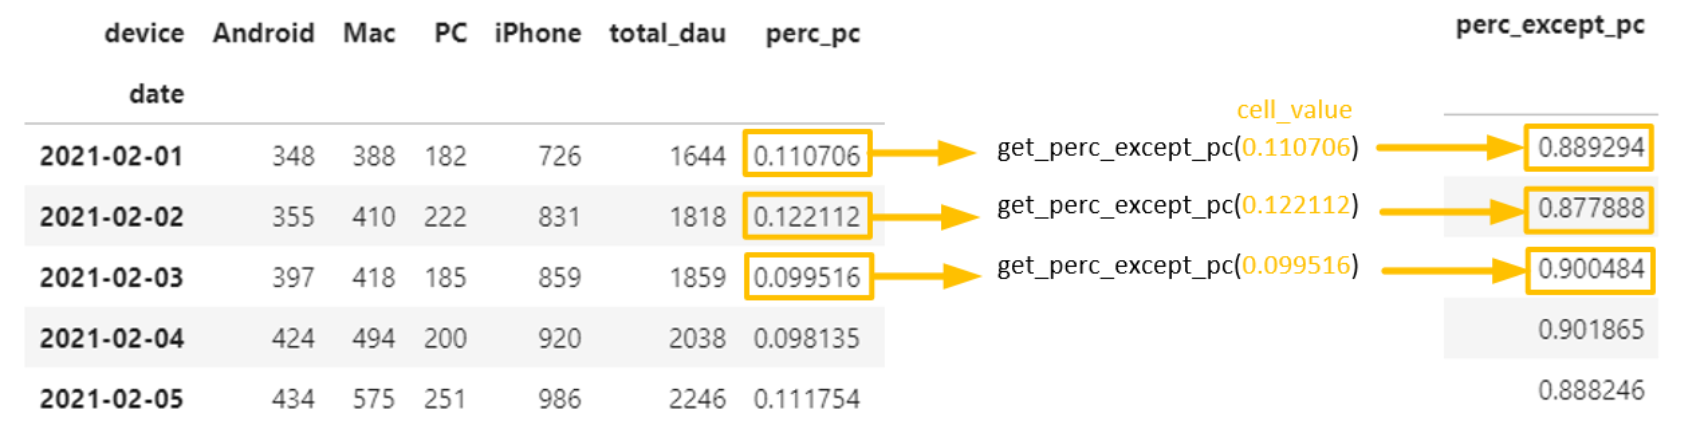  

Таким образом, если вы хотите модифицировать столбец или создать новый столбец, используя
данные только одного столбца, то вы используете формат  
dau[ИМЯ_СТОЛБЦА_1] = dau[ИМЯ_СТОЛБЦА_2].apply(ПРИМЕНЯЕМАЯ_ФУНКЦИЯ)  

Если вы хотите вычислить значение столбца, используя значения нескольких столбцов, то apply нужно
применять по-другому.  

Пример 2: допустим, вы хотете вычислить, какой процент от общего DAU составляет сумма DAU для
платформ Android и Mac. Для этого напишем функцию:

In [29]:
def get_perc_android_mac(row_values):
    return (row_values['Android'] + row_values['Mac']) / row_values['total_dau'] * 100


dau_device['perc_android_mac'] = dau_device.apply(get_perc_android_mac, axis=1)
dau_device.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc,perc_android_mac
date,,,,,,,,
2021-02-01,472,303,312,640,1727,18.066010,81.933990,44.875507
2021-02-02,549,325,328,697,1899,17.272249,82.727751,46.024223
2021-02-03,593,349,336,716,1994,16.850552,83.149448,47.241725
2021-02-04,618,372,356,756,2102,16.936251,83.063749,47.098002
2021-02-05,653,380,375,840,2248,16.681495,83.318505,45.951957


In [30]:
dau_device.apply(lambda x: (x['Android'] + x['Mac']) / x['total_dau'] * 100, axis=1)

date
2021-02-01    44.875507
2021-02-02    46.024223
2021-02-03    47.241725
2021-02-04    47.098002
2021-02-05    45.951957
                ...    
2021-05-27    46.373308
2021-05-28    46.405530
2021-05-29    46.044370
2021-05-30    46.960866
2021-05-31    44.789357
Length: 120, dtype: float64

Посмотрим, как это работает:  
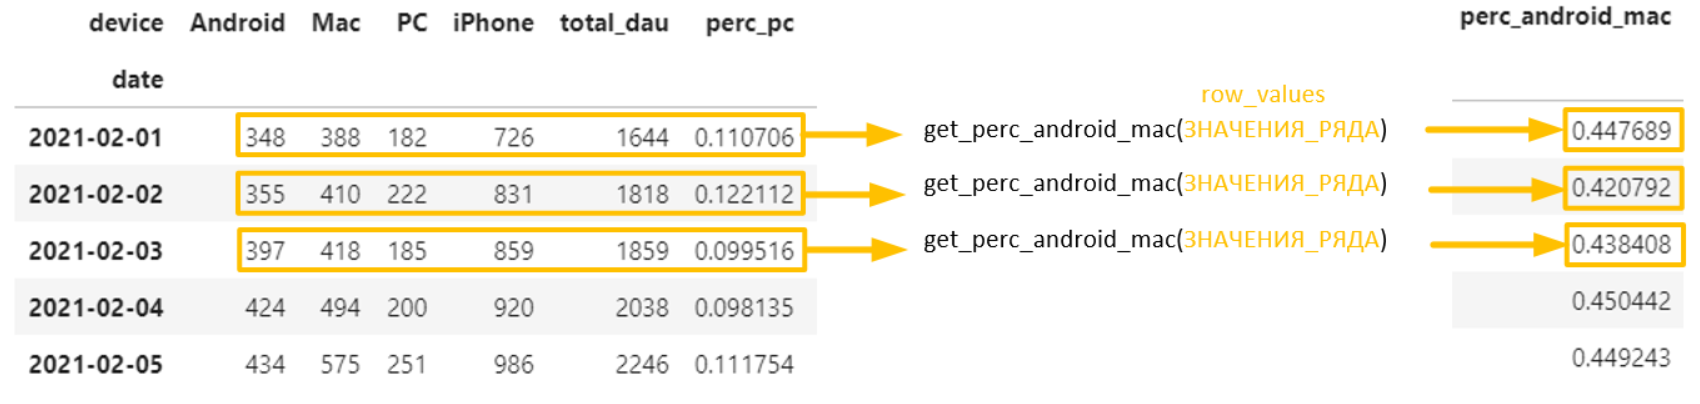  

Обратите внимание на то, как применяется команда apply в этом случае:
1. apply применяется не к конкретному столбцу, а к фрейму целиком: dau.apply(...)
2. При вызове apply указывается axis = 1. Это означает, что внуть функции get_perc_android_mac будет переданы все значения текущего ряда.

Apply - это второй по скорости метод массовой модификации данных в фреймах.

## 3.5 Анализ DAU

Давайте посмотрим как анализировать DAU. Снова построим фрейм с разбивкой DAU по устройствам:

In [31]:
dau = data.pivot_table(index='date', columns='device', values='user_id', aggfunc='nunique')
dau.head(5)

device,Android,Mac,PC,iPhone
date,,,,
2021-02-01,472,303,312,640
2021-02-02,549,325,328,697
2021-02-03,593,349,336,716
2021-02-04,618,372,356,756
2021-02-05,653,380,375,840


Построим график:

Text(0, 0.5, 'Уникальные пользователи')

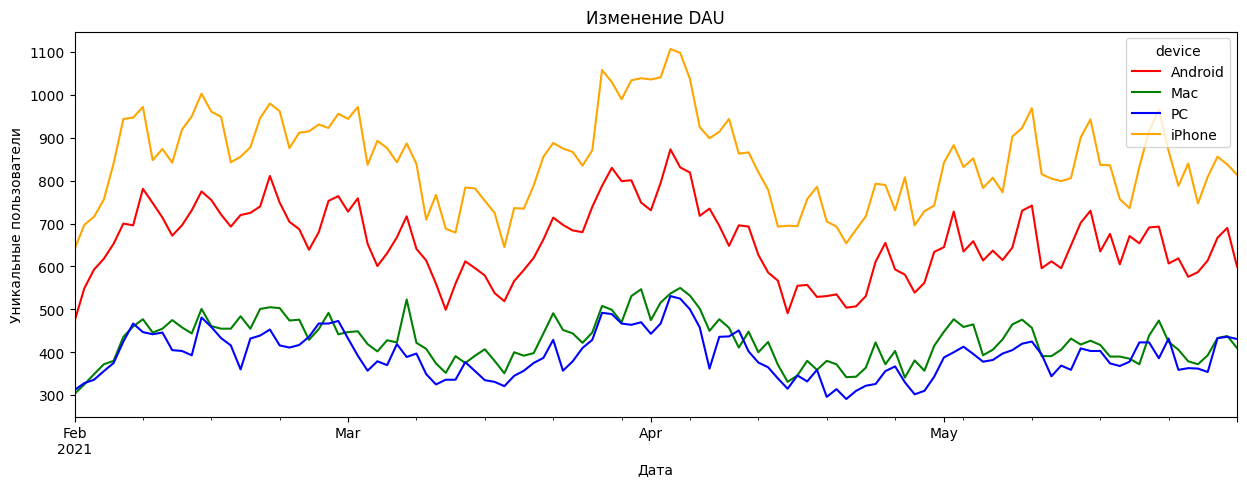

In [32]:
dau.plot(figsize=(15, 5), color=['red', 'green', 'blue', 'orange'])
plt.title('Изменение DAU')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')

Какие выводы мы можем следать по этому графику:
1. Большинство пользователей системы используют iPhone;
2. В данных явно наблюдается недельная и месячная сезонность, но, в целом посещаемость стабильная.

Давайте используем наши навыки о модификации данных в фреймах для того, чтобы посчитать какой процент от DAU составляют пользователи с мобильных устройств:

In [33]:
dau_perc = dau.copy()
dau_perc['Total'] = dau_perc['Android'] + dau_perc['Mac'] + dau_perc['PC'] + dau_perc['iPhone']
dau_perc['Mobile'] = dau_perc['Android'] + dau_perc['iPhone']
dau_perc['Others'] = dau_perc['Mac'] + dau_perc['PC']
dau_perc.head(5)

device,Android,Mac,PC,iPhone,Total,Mobile,Others
date,,,,,,,
2021-02-01,472,303,312,640,1727,1112,615
2021-02-02,549,325,328,697,1899,1246,653
2021-02-03,593,349,336,716,1994,1309,685
2021-02-04,618,372,356,756,2102,1374,728
2021-02-05,653,380,375,840,2248,1493,755


Переведем столбцы в проценты:

In [34]:
dau_perc['Mobile'] = dau_perc['Mobile'] / dau_perc['Total'] * 100
dau_perc['Others'] = dau_perc['Others'] / dau_perc['Total'] * 100
dau_perc.head(5)

device,Android,Mac,PC,iPhone,Total,Mobile,Others
date,,,,,,,
2021-02-01,472,303,312,640,1727,64.389114,35.610886
2021-02-02,549,325,328,697,1899,65.613481,34.386519
2021-02-03,593,349,336,716,1994,65.646941,34.353059
2021-02-04,618,372,356,756,2102,65.366318,34.633682
2021-02-05,653,380,375,840,2248,66.414591,33.585409


Построим диаграммы с накоплением:

Text(0, 0.5, 'Уникальные пользователи')

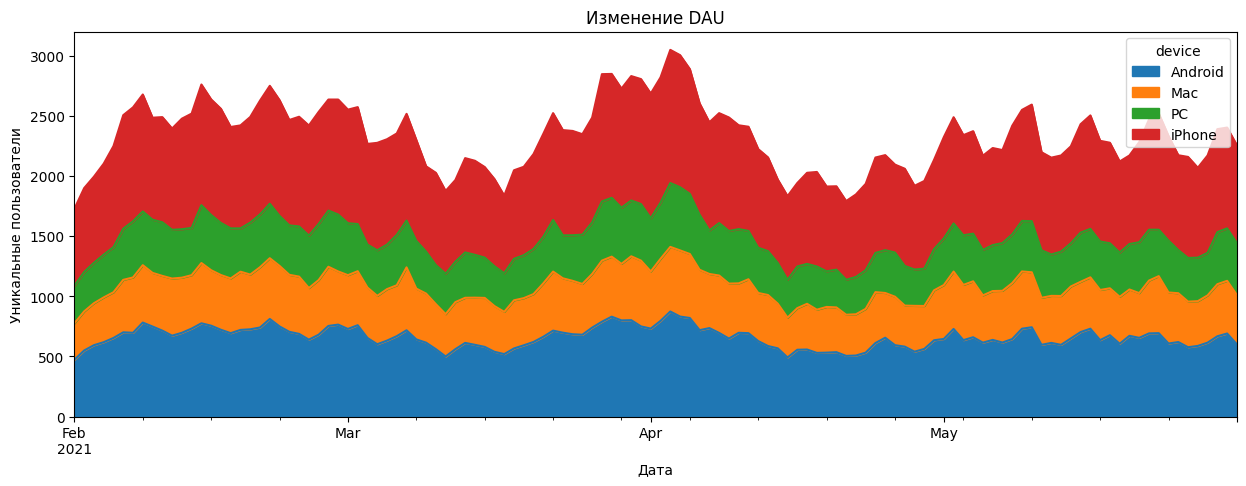

In [35]:
dau_perc[['Android', 'Mac', 'PC', 'iPhone']].plot.area(figsize=(15, 5))
plt.title('Изменение DAU')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')

Text(0, 0.5, '% уникальных посетителей')

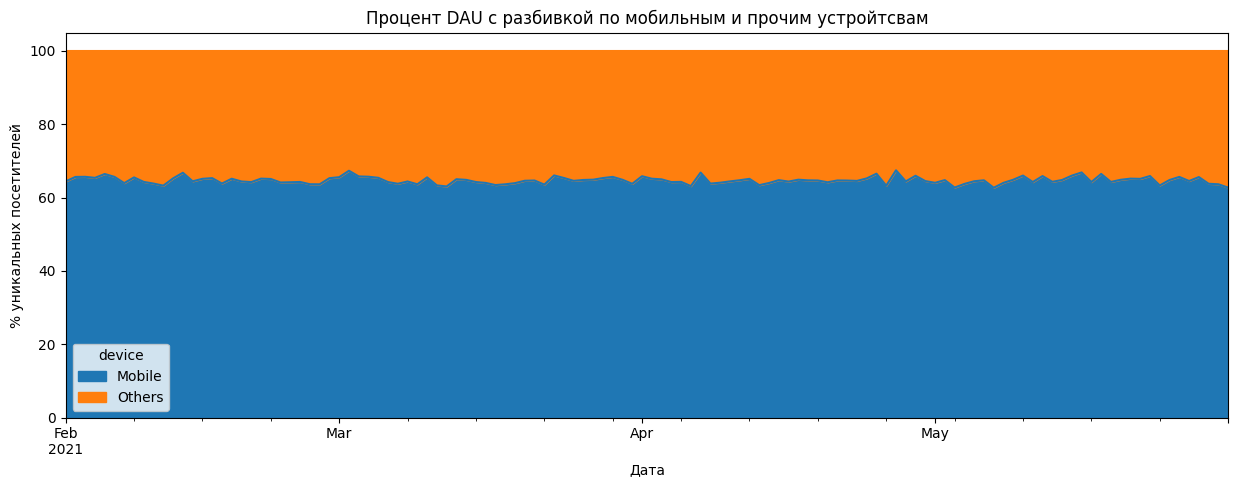

In [36]:
dau_perc[['Mobile', 'Others']].plot.area(figsize=(15, 5))
plt.title('Процент DAU с разбивкой по мобильным и прочим устройтсвам')
plt.xlabel('Дата')
plt.ylabel('% уникальных посетителей')

Вывод: примерно 65% всей аудитории приходят с мобильных устройств. Когда продуктовые менеджеры разрабатывают новые фичи, они должны прежде всего ориентироваться на мобильных пользователей.

## Заключение

В это уроке вы узнали:
- Что такое DAU и как оно используется
- Как строить линейные графики и графики областей с накоплением
- Как выполнять математические операции над столбцами
- Как модифицировать данные с помощью apply

## Дополнительные материалы

1. [Еще немного про DAU и некоторые другие KPI](https://gravitec.net/ru/blog/mau-dau-arpu-ili-metriki-poseshhaemosti-kotory-e-nado-znat/)
2. [Коды цветов на графиках matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html)
3. [Кратко и понятно о разных метриках](https://yandex.ru/adv/edu/materials/tag-metrika)